In [1]:
import numpy as np
import healpy as hp
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [2]:
import intake
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["EU"]

In [86]:
import pandas as pd

pd.DataFrame(cat["casesm2_10km_nocumulus"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H, PT6H]",PT6H
1,zoom,zoom resolution of the dataset,int,"[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",9


In [3]:
print(list(cat))

['ERA5', 'IR_IMERG', 'JRA3Q', 'MERRA2', 'casesm2_10km_nocumulus', 'icon_d3hp003', 'icon_d3hp003aug', 'icon_d3hp003feb', 'icon_ngc4008', 'ifs_tco3999-ng5_deepoff', 'ifs_tco3999-ng5_rcbmf', 'ifs_tco3999-ng5_rcbmf_cf', 'nicam_gl11', 'scream-dkrz', 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest', 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest', 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest', 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest', 'um_glm_n1280_CoMA9_TBv1p2', 'um_glm_n1280_GAL9', 'um_glm_n2560_RAL3p3']


In [56]:
ds = cat["ifs_tco3999-ng5_deepoff"](dim='2D', time='PT1H', zoom=11).to_dask()

/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/xzarr.py:46: UserWarning: The specified chunks separate the stored chunks along dimension "value" starting at index 16777216. This could degrade performance. Instead, consider rechunking after loading.
  self._ds = xr.open_dataset(self.urlpath, **kw)
/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/xzarr.py:46: UserWarning: The specified chunks separate the stored chunks along dimension "value" starting at index 16777216. This could degrade performance. Instead, consider rechunking after loading.
  self._ds = xr.open_dataset(self.urlpath, **kw)
/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/xzarr.py:46: UserWarning: The specified chunks separate the stored chunks along dimension "value" starting at index 16777216. This could degrade performance. Instead, consider rechunking after loading.
  self._ds = xr.open_dataset(self.urlpath

In [71]:
u = ds['10u'][1,:]
v = ds['10v'][1,:]
speed = np.hypot(u, v).values

In [58]:
ds2 = cat["icon_d3hp003"](time='PT1H', time_method='inst', zoom=11).to_dask()

/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [72]:
u2 = ds2['uas'][1,:]
v2 = ds2['vas'][1,:]
speed2 = np.hypot(u2, v2).values

In [110]:
ds3 = cat["nicam_gl11"](time='PT1H', zoom=9).to_dask()

/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [111]:
u3 = ds3['uas'][1,:]
v3 = ds3['vas'][1,:]
speed3 = np.hypot(u3, v3).values

In [69]:
speed3

array([8.00322393, 8.29568927, 8.27910529, ..., 8.6363525 , 8.33422171,
       8.52505827], shape=(3145728,))

In [93]:
ds4 = cat["casesm2_10km_nocumulus"](time='PT1H', zoom=8).to_dask()

/work/ab0995/a270088/mambaforge/envs/hk25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [97]:
u4 = ds4['uas'][1,:]
v4 = ds4['vas'][1,:]
speed4 = np.hypot(u4, v4).values

In [98]:
speed4

array([7.451098 , 7.7789216, 8.124207 , ..., 2.405241 , 2.7859898,
       2.5391765], shape=(786432,), dtype=float32)

/tmp/ipykernel_248221/237305877.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


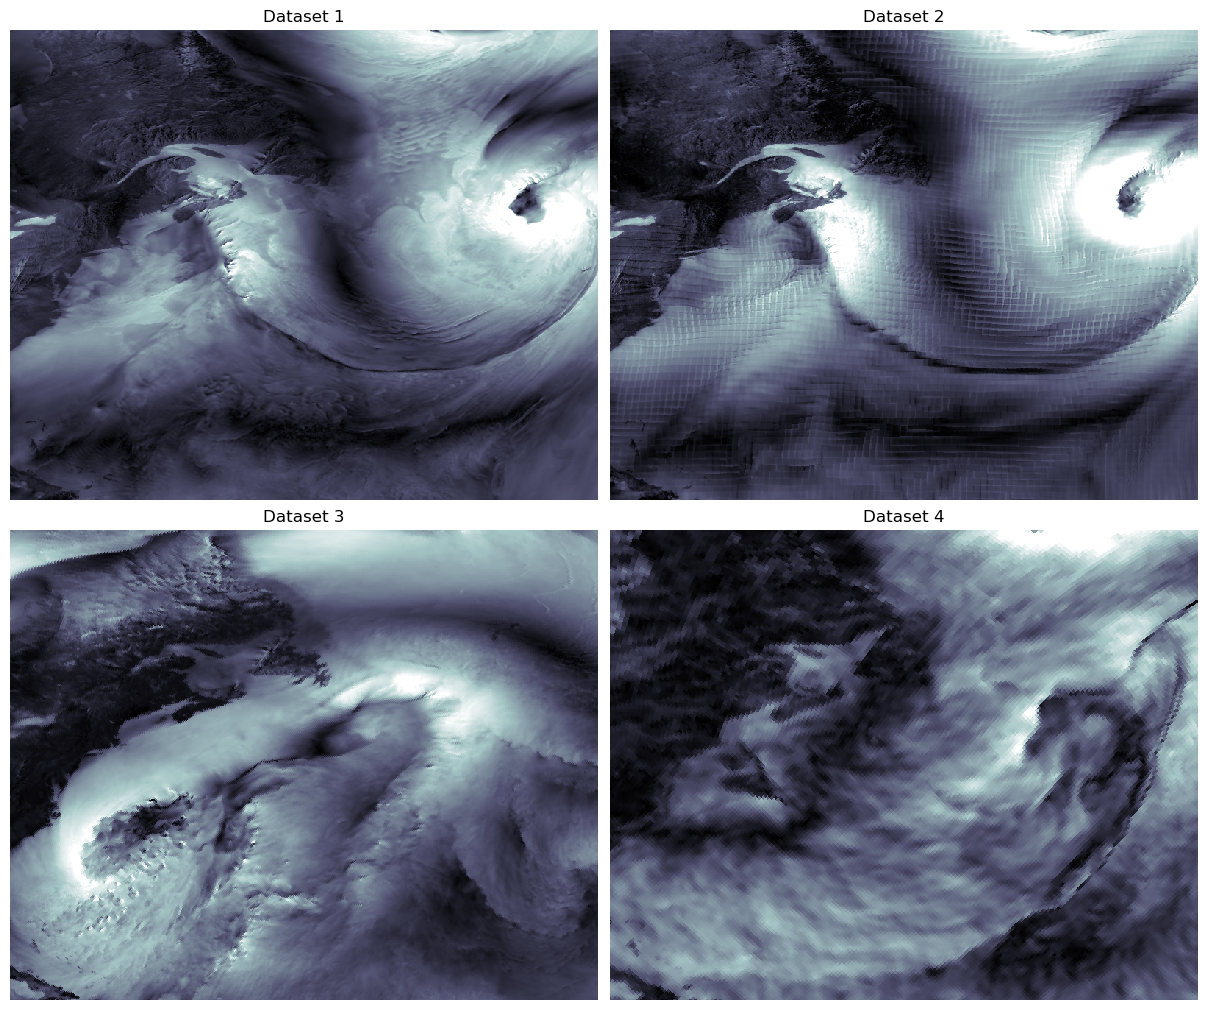

In [103]:

# suppose you have a list of maps to plot
maps = [speed, speed2, speed3, speed4]
nrows, ncols = 2, 2
vmin, vmax = 0, 20

fig = plt.figure(figsize=(12, 10))
# make room on the right for a single shared colorbar
fig.subplots_adjust(wspace=0.05, hspace=0.1, right=0.88)

for idx, m in enumerate(maps):
    sub = 100*nrows + 10*ncols + (idx+1)
    hp.cartview(
        m,
        sub=sub,
        nest=True,
        flip='geo',
        lonra=[-80, -30],
        latra=[20, 60],
        min=vmin, max=vmax,
        cbar=False,
        notext=True,
        title=f'Dataset {idx+1}',
        cmap =cm.bone,

    )

# **Now** the current axes (gca) is still the last map axes.
map_ax = plt.gca()
# grab its image artist
im = map_ax.get_images()[0]

# only now add the colorbar axes in the margin
# cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
# cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_label('speed')
plt.tight_layout()

# plt.show()

In [115]:
for i in range(1,100):
    u = ds['10u'][i,:]
    v = ds['10v'][i,:]
    speed = np.hypot(u, v).values

    u2 = ds2['uas'][i,:]
    v2 = ds2['vas'][i,:]
    speed2 = np.hypot(u2, v2).values

    
    test_u3 = ds3['uas'][i,:]
    if 
    np.isnan(u3.max())
    u3 = ds3['uas'][i,:]
    v3 = ds3['vas'][i,:]
    speed3 = np.hypot(u3, v3).values

    u4 = ds4['uas'][i,:]
    v4 = ds4['vas'][i,:]
    speed4 = np.hypot(u4, v4).values
    
    maps = [speed, speed2, speed3, speed4]
    datasets = ["ifs_tco3999-ng5_deepoff", "icon_d3hp003", 'nicam_gl11', 'casesm2_10km_nocumulus']
    nrows, ncols = 2, 2
    vmin, vmax = 0, 20
    
    fig = plt.figure(figsize=(12, 10))
    # make room on the right for a single shared colorbar
    fig.subplots_adjust(wspace=0.05, hspace=0.1, right=0.88)
    
    for idx, model_data in enumerate(zip(maps,datasets)):
        m = model_data[0]
        title = model_data[1]
        sub = 100*nrows + 10*ncols + (idx+1)
        hp.cartview(
            m,
            sub=sub,
            nest=True,
            flip='geo',
            lonra=[-80, -30],
            latra=[20, 60],
            min=vmin, max=vmax,
            cbar=False,
            notext=True,
            title=title,#f'Dataset {idx+1}',
            cmap =cm.bone,
    
        )
    
    # **Now** the current axes (gca) is still the last map axes.
    map_ax = plt.gca()
    # grab its image artist
    im = map_ax.get_images()[0]
    
    # only now add the colorbar axes in the margin
    # cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
    # cb = fig.colorbar(im, cax=cax, orientation='vertical')
    cb.set_label('speed')
    plt.tight_layout()
    plt.savefig(f'/work/ab0995/a270088/HK25/wind/{str(i).zfill(10)}_wind.png')
    plt.close(fig)
    print(f"Saved frame {i} → {"/work/ab0995/a270088/HK25/wind/"}")


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 1 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 2 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 3 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 4 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 5 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 6 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 7 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 8 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 9 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 10 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 11 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 12 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 13 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 14 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 15 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 16 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 17 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 18 → /work/ab0995/a270088/HK25/wind/


/tmp/ipykernel_248221/3917101943.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved frame 19 → /work/ab0995/a270088/HK25/wind/


KeyboardInterrupt: 